In [ ]:
import numpy as np
import pandas as pd
import random
from scipy.stats import norm
from scipy.stats import uniform
import requests
import json
import matplotlib.pyplot as plt

In [ ]:
ELO_array = np.zeros(100)
for player in range(len(ev_array)):
  ELO_array[player] = (1.2*np.sum(ev_array[player][:2000]/2000)) + (1.1 * np.sum(ev_array[player][2001:3000]/1000))+  (np.sum(ev_array[player][3001:4000]/1000))
ELO_array += 100
ELO_array.min(), ELO_array.max()

(59.49819469368087, 73.31314929723354)

In [ ]:
endpoint = "https://api.openai.com/v1/completions"
prompt = "Once upon a time, in a far-off land, there was a young prince named John."
params = {"model": "text-davinci-003","prompt": prompt,"max_tokens": 50}
headers = {"Authorization": f"Bearer {api_key}","Content-Type": "application/json"}
response = requests.post(endpoint, data=json.dumps(params), headers=headers)
if response.status_code == 200:
    print("API call successful.")
    print("Response:")
    print(response.json())
else:
    print(f"API call failed with status code {response.status_code}.")
    print("Error message:")
    print(response.text)

API call failed with status code 404.
Error message:
{
    "error": {
        "message": "The model `text-davinci-003` has been deprecated, learn more here: https://platform.openai.com/docs/deprecations",
        "type": "invalid_request_error",
        "param": null,
        "code": "model_not_found"
    }
}



In [ ]:
ranks = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
suits = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
hole_cards = {}
card_number = 1
for rank in range(len(ranks)):
    for suit in range(len(suits)):
      hole_cards[card_number] = str(ranks[rank]) + " of " + str(suits[suit])
      card_number += 1
list_hole_cards = list(hole_cards.values())
positions = ["BTN","SB","BB","UTG","HJ","CO"]
dealt_hole_cards = random.sample(list_hole_cards,2)
position = random.sample(positions, 1)[0]
print("You are dealt", dealt_hole_cards[0], dealt_hole_cards[1], "in the", position, "position.")

You are dealt J of Clubs 5 of Diamonds in the HJ position.


In [ ]:
#Button decision making
if position == "BTN":
  if dealt_hole_cards[0][0] == dealt_hole_cards[1][0]:
    print("You should raise this hand to 2.5 BB.")

You should raise this hand to 2.5 BB.


In [ ]:
import numpy as np

def update_ev(current_rating, ev_loss, games_played):
    K_BASE = 20  # Base K-factor for rating adjustments
    K = K_BASE * (1 / 100* np.log(0.4 * (games_played + 6))) * (1 / 100 * np.log(0.4 * (current_rating + 6)))

    # Calculate rating change based on EV loss
    if ev_loss == 0:
        rating_change = K
    else:
        # Decrease rating based on the severity of EV loss, assuming EV loss is properly scaled
        rating_change = K * (ev_loss*0.125)  # Assuming EV loss is scaled; adjust divisor as needed for actual scale
        # print(rating_change)
    if games_played < 250:
      rating_change *= 800
    elif games_played < 500:
      rating_change *= 400
    elif games_played < 750:
      rating_change *= 200
    elif games_played < 1000:
      rating_change *= 100
    newrating = current_rating + rating_change
    return newrating

In [ ]:
#random seed 1 and 27
np.random.seed(1)
current_ratinglist = []
ev_array = np.zeros(1000)
for i in range(0,len(ev_array),2):
  ev_array[i] = -1 * np.random.exponential(7.5)
ev_array.min(),ev_array.max()
current_rating = 1000
for i in range(len(ev_array)):
  current_rating = (update_ev(current_rating, ev_array[i], i))
  if i % 10 == 0 :
    current_ratinglist.append(current_rating)
print(current_ratinglist)

[995.7501369875994, 1042.7097241366807, 1096.0883647280311, 1110.631582858044, 1159.8864161304932, 1046.3797425947096, 1126.57473091951, 1103.7317712115428, 987.6825957737258, 1030.945141563847, 1100.949839550864, 1202.3352743992893, 1278.0505354758789, 1361.414248995358, 1260.3619183766612, 1363.4793886296006, 1261.2489283480775, 1257.868840929168, 1225.7324929948336, 1227.9708414106353, 1258.8164570502995, 1198.8833373059203, 1002.98352500183, 993.1949075403767, 989.9325364940471, 1098.682945715432, 1126.8620031633154, 1107.3486238779042, 1085.5723726554422, 1191.067107871829, 1255.8813939379613, 1237.1542490312868, 1204.4173494782135, 1243.3682891453482, 1299.1261507846837, 1236.816639675711, 1292.1530384606738, 1331.5824234138313, 1341.944838121594, 1278.872493818215, 1233.1190456948104, 1229.30811198881, 1180.6682419743195, 1200.4073501426403, 1209.1290423502544, 1205.7705628157403, 1144.9914820640977, 1169.0661836164234, 1213.0079646406796, 1201.037985289272, 1227.195952446685, 1

In [ ]:
class Problem:
    def __init__(self, time_created: int, hero_position: Position, villain_position: Position,
                 hole_cards: str, board: str, action_history: List[Action], river_option_evs: List[OptionEVPair]):
        self.time_created = time_created
        self.hero_position = hero_position
        self.villain_position = villain_position
        self.hole_cards = hole_cards
        self.board = board
        self.action_history = action_history
        self.river_option_evs = river_option_evs

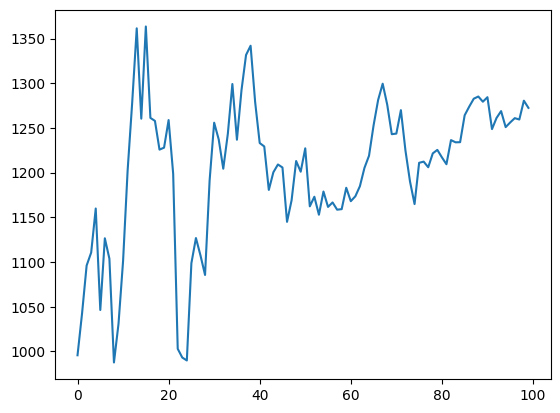

In [ ]:
plt.plot(current_ratinglist)

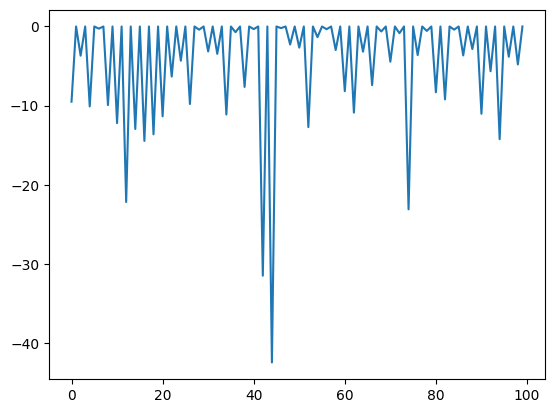

In [ ]:
plt.plot(ev_array[:100])